In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
import statistics as st
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("/home/sakshi/Downloads/train_ctrUa4K.csv")

In [3]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
data=data.set_index(keys='Loan_ID')

In [5]:
data_predict=pd.read_csv("/home/sakshi/Downloads/test_lAUu6dG.csv")

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, LP001002 to LP002990
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 62.4+ KB


In [7]:
data['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [8]:
cat_var=data.select_dtypes(include='object')
cont_var=data.select_dtypes(include=['int64','float64'])

In [9]:
cat_var.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
Loan_ID,,,,,,,
LP001002,Male,No,0,Graduate,No,Urban,Y
LP001003,Male,Yes,1,Graduate,No,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
LP001008,Male,No,0,Graduate,No,Urban,Y


In [10]:
cat_var

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
Loan_ID,,,,,,,
LP001002,Male,No,0,Graduate,No,Urban,Y
LP001003,Male,Yes,1,Graduate,No,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
LP001008,Male,No,0,Graduate,No,Urban,Y
...,...,...,...,...,...,...,...
LP002978,Female,No,0,Graduate,No,Rural,Y
LP002979,Male,Yes,3+,Graduate,No,Rural,Y
LP002983,Male,Yes,1,Graduate,No,Urban,Y


In [11]:
from sklearn.preprocessing import LabelEncoder


In [12]:
le=LabelEncoder()

In [14]:
cat_var=cat_var.apply(le.fit_transform)

In [15]:
new_data=cont_var.join(cat_var)

In [16]:
new_data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,5849,0.0,NaN,360.0,1.0,1,0,0,0,0,2,1
LP001003,4583,1508.0,128.0,360.0,1.0,1,1,1,0,0,0,0
LP001005,3000,0.0,66.0,360.0,1.0,1,1,0,0,1,2,1
LP001006,2583,2358.0,120.0,360.0,1.0,1,1,0,1,0,2,1
LP001008,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,2,1


In [17]:
new_data.isna().sum()

ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
Property_Area         0
Loan_Status           0
dtype: int64

In [18]:
new_data=new_data.dropna()

In [19]:
new_data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001003,4583,1508.0,128.0,360.0,1.0,1,1,1,0,0,0,0
LP001005,3000,0.0,66.0,360.0,1.0,1,1,0,0,1,2,1
LP001006,2583,2358.0,120.0,360.0,1.0,1,1,0,1,0,2,1
LP001008,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,2,1
LP001011,5417,4196.0,267.0,360.0,1.0,1,1,2,0,1,2,1


In [20]:
print(data.shape)
print(new_data.shape)

(614, 12)
(529, 12)


<AxesSubplot:>

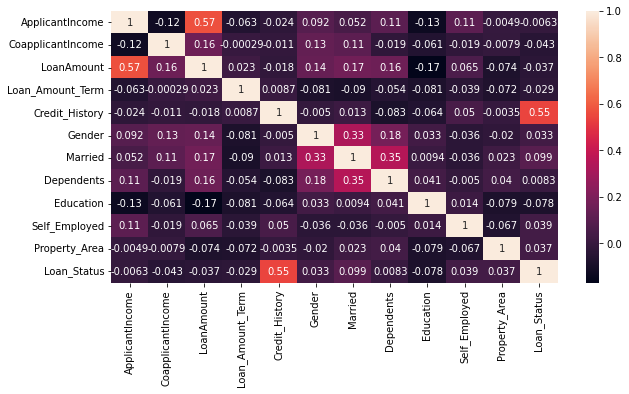

In [21]:
plt.figure(figsize=(10,5))
sns.heatmap(new_data.corr(),annot=True)

### Model Building

### Simple Ensemble Techniques
#### Max Voting
The max voting method is generally used for classification problems. In this technique, multiple models are used to make predictions for each data point. 

#### Averaging
Similar to the max voting technique, multiple predictions are made for each data point in averaging. In this method, we take an average of predictions from all the models and use it to make the final prediction. Averaging can be used for making predictions in regression problems or while calculating probabilities for classification problems.

#### Weighted Averaging
This is an extension of the averaging method. All models are assigned different weights defining the importance of each model for prediction. For instance, if two of your colleagues are critics, while others have no prior experience in this field, then the answers by these two friends are given more importance as compared to the other people.

### Max Voting

In [22]:
model1 = DecisionTreeClassifier()
model2 = KNeighborsClassifier()
model3= LogisticRegression()

In [23]:
x=new_data.drop(columns=['Loan_Status'])
y=new_data['Loan_Status']

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [25]:
print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(423, 11)
(423,)
(106, 11)
(106,)


In [27]:
model1.fit(x_train,y_train)
model2.fit(x_train,y_train)
model3.fit(x_train,y_train)

# PREDICTION
pred1=model1.predict(x_test)
pred2=model2.predict(x_test)
pred3=model3.predict(x_test)

In [28]:
final_pred=[]
for i in range(0,len(x_test)):
    final_pred.append(st.mode([pred1[i],pred2[i],pred3[i]]))

In [29]:
final_pred

[1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0]

In [30]:
confusion_matrix(final_pred,y_test)

array([[14,  4],
       [22, 66]])

In [31]:
accuracy_score(final_pred,y_test)

0.7547169811320755

In [32]:
print(classification_report(final_pred,y_test))

              precision    recall  f1-score   support

           0       0.39      0.78      0.52        18
           1       0.94      0.75      0.84        88

    accuracy                           0.75       106
   macro avg       0.67      0.76      0.68       106
weighted avg       0.85      0.75      0.78       106



### Averaging

In [33]:
finalpred1=(pred1+pred2+pred3)/3


In [34]:
finalpred1.tolist()

[1.0,
 1.0,
 1.0,
 1.0,
 0.3333333333333333,
 1.0,
 0.6666666666666666,
 0.3333333333333333,
 0.0,
 1.0,
 0.6666666666666666,
 0.3333333333333333,
 1.0,
 0.6666666666666666,
 1.0,
 1.0,
 1.0,
 0.3333333333333333,
 0.3333333333333333,
 1.0,
 0.6666666666666666,
 1.0,
 0.6666666666666666,
 0.3333333333333333,
 0.3333333333333333,
 1.0,
 0.6666666666666666,
 1.0,
 0.6666666666666666,
 1.0,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.3333333333333333,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.6666666666666666,
 0.3333333333333333,
 1.0,
 1.0,
 1.0,
 1.0,
 0.6666666666666666,
 1.0,
 0.3333333333333333,
 0.3333333333333333,
 1.0,
 0.6666666666666666,
 1.0,
 1.0,
 1.0,
 1.0,
 0.6666666666666666,
 1.0,
 1.0,
 1.0,
 1.0,
 0.6666666666666666,
 1.0,
 0.6666666666666666,
 0.6666666666666666,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.6666666666666666,
 1.0,
 0.6666666666666666,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.6666666666666666,
 1.0,
 0.6666

### Weighted Average

In [35]:
finalpred3=(pred1*0.3+pred2*0.3+pred3*0.4)


In [36]:
finalpred3

array([1. , 1. , 1. , 1. , 0.3, 1. , 0.7, 0.3, 0. , 1. , 0.7, 0.3, 1. ,
       0.6, 1. , 1. , 1. , 0.4, 0.3, 1. , 0.7, 1. , 0.7, 0.4, 0.4, 1. ,
       0.7, 1. , 0.7, 1. , 0.7, 0.6, 0.7, 0.4, 1. , 1. , 1. , 1. , 1. ,
       1. , 0.7, 0.4, 1. , 1. , 1. , 1. , 0.7, 1. , 0.3, 0.3, 1. , 0.7,
       1. , 1. , 1. , 1. , 0.7, 1. , 1. , 1. , 1. , 0.7, 1. , 0.7, 0.7,
       1. , 1. , 1. , 1. , 1. , 0.7, 1. , 0.6, 1. , 0. , 1. , 1. , 1. ,
       1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 0.7, 1. , 0.7, 0.3, 0.3,
       0.7, 1. , 0.7, 0.3, 1. , 1. , 0.7, 1. , 0.4, 1. , 1. , 1. , 1. ,
       1. , 0.3])

## Advanced Ensemble Techniques

#### Stacking

#### Blending

#### Bagging

   ->Bagging meta-estimator 
   
   ->Random Forest
   
#### Boosting

   ->GBM
   
   ->XGBoost 
   
   ->LightGBM
   
   ->CatBoost

### STACKING
Stacking is an ensemble learning technique that uses predictions from multiple models (for example decision tree, knn or svm) to build a new model. This model is used for making predictions on the test set.

In [42]:
model1 = DecisionTreeClassifier()
model1.fit(x_train,y_train)
pred_train_dt=model1.predict(x_train)
pred_test_dt=model1.predict(x_test)

In [43]:
model2 = KNeighborsClassifier()
model2.fit(x_train,y_train)
pred_train_kn=model2.predict(x_train)
pred_test_kn=model2.predict(x_test)

In [46]:
pred_train_df_dt=pd.DataFrame(pred_train_dt)
pred_test_df_dt=pd.DataFrame(pred_test_dt)

In [47]:
pred_train_df_kn=pd.DataFrame(pred_train_kn)
pred_test_df_kn=pd.DataFrame(pred_test_kn)

In [49]:
df_train=pd.concat([pred_train_df_dt,pred_train_df_kn],axis=1)
df_test=pd.concat([pred_test_df_dt,pred_test_df_kn],axis=1)

In [50]:
df_train

,0,0
0,0,1
1,1,1
2,1,1
3,0,0
4,1,1
...,...,...
418,1,1
419,1,1
420,1,1
421,1,1


In [51]:
model = LogisticRegression(random_state=1)
model.fit(df_train,y_train)
model.score(df_test, y_test)

0.6886792452830188

In [53]:
test=model.predict(df_test)

In [54]:
accuracy_score(test,y_test)

0.6886792452830188

In [55]:
confusion_matrix(test,y_test)

array([[16, 13],
       [20, 57]])

### Blending
Blending follows the same approach as stacking but uses only a holdout (validation) set from the train set to make predictions. In other words, unlike stacking, the predictions are made on the holdout set only. The holdout set and the predictions are used to build a model which is run on the test set.

### Bagging
Bootstrapping is a sampling technique in which we create subsets of observations from the original dataset, with replacement. The size of the subsets is the same as the size of the original set.

Bagging (or Bootstrap Aggregating) technique uses these subsets (bags) to get a fair idea of the distribution (complete set). The size of subsets created for bagging may be less than the original set.

1.Multiple subsets are created from the original dataset, selecting observations with replacement.

2.A base model (weak model) is created on each of these subsets.

3.The models run in parallel and are independent of each other.

4.The final predictions are determined by combining the predictions from all the models.


### Bagging algorithms:

Bagging meta-estimator

Random forest

In [56]:
from sklearn.ensemble import BaggingClassifier
from sklearn import tree
model = BaggingClassifier(tree.DecisionTreeClassifier(random_state=1))
model.fit(x_train, y_train)
model.score(x_test,y_test)

0.7547169811320755

In [57]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=1)
model.fit(x_train, y_train)
model.score(x_test,y_test)

0.8018867924528302

### Boosting Algorithms:
Boosting is a sequential process, where each subsequent model attempts to correct the errors of the previous model. The succeeding models are dependent on the previous model.


AdaBoost

GBM

XGBM

Light GBM

CatBoost

In [60]:
from sklearn.ensemble import AdaBoostClassifier
model1 = AdaBoostClassifier(random_state=1)
model1.fit(x_train, y_train)
model1.score(x_test,y_test)

0.8018867924528302

In [63]:
from sklearn.ensemble import GradientBoostingClassifier
model= GradientBoostingClassifier(learning_rate=0.01,random_state=1)
model.fit(x_train, y_train)
model.score(x_test,y_test)

0.8018867924528302

In [64]:
import xgboost as xgb
model=xgb.XGBClassifier(random_state=1,learning_rate=0.01)
model.fit(x_train, y_train)
model.score(x_test,y_test)

[11:10:51] WARNING: /tmp/pip-build-dpzz6duj/xgboost/build/temp.linux-x86_64-3.6/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.8113207547169812